In [392]:
import pandas as pd

In [393]:
import warnings
warnings.filterwarnings("ignore")

In [394]:
# loading Zillow data
temp_zillow_df = pd.read_csv('assets/ZHVI_Single_Family_Homes.csv')
temp_zillow_df.head(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1/31/18,...,3/31/21,4/30/21,5/31/21,6/30/21,7/31/21,8/31/21,9/30/21,10/31/21,11/30/21,12/31/21
0,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,324431.6104,...,364177.2031,371101.6911,378932.3467,387075.4845,394738.1554,401313.5299,406753.6395,411963.8185,417782.6985,423914.2154
1,61148,2,8701,zip,NJ,NJ,Lakewood,"New York-Newark-Jersey City, NY-NJ-PA",Ocean County,417243.3511,...,465838.7913,472343.0159,480741.7186,490304.4363,498511.7880,505783.2636,512617.1861,521012.6187,530297.6728,539475.0644
2,91940,3,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,178208.1535,...,214134.1939,217265.5964,221079.8262,225544.5629,229812.7357,233477.1635,236563.1907,239906.2628,243626.3107,247528.1813
3,62080,4,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,769308.9294,...,845311.9074,850380.1385,854289.7239,857828.4866,859418.8230,858219.1126,856281.1636,858350.0645,863224.0930,867940.3114
4,91733,5,77084,zip,TX,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,174331.6082,...,212190.8617,215485.2578,219321.0846,223605.3978,227452.0577,230457.3995,232665.7759,235116.4975,238116.0039,241630.9910


In [395]:
def clean_zillow_data(df):
    
    # Get all column names
    column_names = temp_zillow_df.columns
    
    # Get all the column names used to pivot the data 
    column_names_ids = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'City', 'Metro', 'CountyName']
    
    # Get all the column names used to pivot the data 
    column_names_values = list(set(column_names).difference(column_names_ids))
    
    # Melt the dataframe 
    zillow_df = temp_zillow_df.melt(id_vars=column_names_ids,
                    var_name='date',
                    value_vars=column_names_values,
                    value_name='sale_price')
    zillow_df = zillow_df.rename(columns={'RegionID':'zipcode'})
    zillow_df['year'] = zillow_df['date'].apply(lambda x: int(str('20'+x.split('/')[-1])))
    return zillow_df

In [396]:
zillow_df = clean_zillow_data(temp_zillow_df)

In [397]:
zillow_df['date'] = pd.to_datetime(pd.to_datetime(zillow_df['date']))

In [398]:
zillow_df['sale_price_lagged_1month'] = (zillow_df.sort_values(by=['date'], ascending=True)
                       .groupby(['zipcode'])['sale_price'].shift(1))

zillow_df['sale_price_lagged_12months'] = (zillow_df.sort_values(by=['date'], ascending=True)
                       .groupby(['zipcode'])['sale_price'].shift(12))

zillow_df['month_over_month_change'] = (zillow_df['sale_price_lagged_1month'] - zillow_df['sale_price'])/zillow_df['sale_price']
zillow_df['year_over_year_change'] = (zillow_df['sale_price_lagged_12months'] - zillow_df['sale_price'])/zillow_df['sale_price']


In [399]:
zillow_df.head(5)

,zipcode,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,date,sale_price,year,sale_price_lagged_1month,sale_price_lagged_12months,month_over_month_change,year_over_year_change
0,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,2021-03-31,364177.2031,2021,358263.7372,335108.1613,-0.016238,-0.079821
1,61148,2,8701,zip,NJ,NJ,Lakewood,"New York-Newark-Jersey City, NY-NJ-PA",Ocean County,2021-03-31,465838.7913,2021,461149.6596,424793.3488,-0.010066,-0.088111
2,91940,3,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,2021-03-31,214134.1939,2021,211306.2749,195574.6417,-0.013206,-0.086673
3,62080,4,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2021-03-31,845311.9074,2021,841100.7947,839923.7433,-0.004982,-0.006374
4,91733,5,77084,zip,TX,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,2021-03-31,212190.8617,2021,209094.7758,192388.7263,-0.014591,-0.093322


# Census Data

In [333]:
# loading censeus feature data
years_to_pick = ['2018', '2019','2020','2021']

In [334]:
census_df = pd.DataFrame()

In [335]:
for i in range(len(years_to_pick)):
    
    temp_census_df = pd.read_csv('assets/census/census'+str(years_to_pick[i])+'.csv')
    temp_census_df['year'] = years_to_pick[i]
    census_df = census_df.append(temp_census_df)

In [336]:
census_df = census_df.rename(columns={'zip code tabulation area':'zipcode'})

In [337]:
len(census_df)

532536

In [338]:
enriched_census_df = census_df.groupby(by=['zipcode','year'], as_index=False).sum()

#enriched_census_df.head(5)

In [339]:
# convert non-integer data to NaN
enriched_census_df = enriched_census_df.apply(pd.to_numeric, errors='coerce')

In [340]:
len(enriched_census_df)

133134

In [341]:
#enriched_census_df.isna().sum()

In [342]:
#census_columns = pd.DataFrame(enriched_census_df.isna().sum()/len(enriched_census_df))
#census_columns_to_include = census_columns[census_columns[0]<0.50].index.values
#census_enriched_df = census_df[census_columns_to_include]

In [343]:
#1) census data m-o-m and y-o-y data points

In [344]:
enriched_census_df[['B17026_002E']]

,B17026_002E
0,1390.0
1,1300.0
2,1203.0
3,1046.0
4,2272.0
...,...
133129,0.0
133130,16.0
133131,15.0
133132,18.0


In [345]:
enriched_census_df.head(5)

,zipcode,year,B01001_001E,B01001_002E,B01001_026E,B01002_001E,B01002_002E,B01002_003E,B05010_001E,B06011_001E,...,B25008_001E,B25008_002E,B25008_003E,B25017_001E,B25017_002E,B25017_003E,B25017_004E,B25017_005E,B25017_006E,__index_level_0__
0,601,2018,17242.0,8426.0,8816.0,40.5,39.5,41.3,3681.0,0.0,...,17165.0,9502.0,7663.0,7176.0,80.0,130.0,397.0,1612.0,3260.0,7541
1,601,2019,17113.0,8533.0,8580.0,41.9,40.1,43.2,3518.0,0.0,...,17038.0,10150.0,6888.0,7250.0,55.0,150.0,316.0,1624.0,3418.0,7541
2,601,2020,16773.0,8318.0,8455.0,42.9,41.6,43.8,3292.0,0.0,...,16700.0,10501.0,6199.0,7282.0,54.0,209.0,288.0,1600.0,3665.0,7541
3,601,2021,17126.0,8451.0,8675.0,43.7,42.6,45.1,3170.0,0.0,...,17052.0,10981.0,6071.0,7306.0,108.0,240.0,260.0,1536.0,3878.0,17959
4,602,2018,38442.0,18842.0,19600.0,42.3,41.9,42.8,6898.0,0.0,...,38357.0,29663.0,8694.0,17403.0,463.0,117.0,938.0,4580.0,9075.0,24514


In [346]:
# Population size
enriched_census_df['total_population'] = enriched_census_df['B01001_001E']

# Percentage of Male and Female
enriched_census_df['gender_pct_male'] = enriched_census_df['B01001_002E'] / enriched_census_df['B01001_001E']
enriched_census_df['gender_pct_female'] = enriched_census_df['B01001_026E'] / enriched_census_df['B01001_001E']

# Median age of population
enriched_census_df['age_total'] = enriched_census_df['B01002_001E']
enriched_census_df['age_male'] = enriched_census_df['B01002_002E']
enriched_census_df['age_female'] = enriched_census_df['B01002_003E']



In [347]:
# Migration
enriched_census_df['migration_non_movers'] = enriched_census_df['B07101_002E']/ (enriched_census_df['B07101_002E'] + \
                                                                                 enriched_census_df['B07101_003E'] + \
                                                                                 enriched_census_df['B07101_004E'])

enriched_census_df['migration_same_state'] = enriched_census_df['B07101_003E']/ (enriched_census_df['B07101_002E'] + \
                                                                                 enriched_census_df['B07101_003E'] + \
                                                                                 enriched_census_df['B07101_004E'])

enriched_census_df['migration_different_state'] = enriched_census_df['B07101_004E']/ (enriched_census_df['B07101_002E'] + \
                                                                                 enriched_census_df['B07101_003E'] + \
                                                                                 enriched_census_df['B07101_004E'])


In [348]:
# travel to work
enriched_census_df['travel_to_work'] = enriched_census_df['B08012_002E'] + enriched_census_df['B08012_003E'] + enriched_census_df['B08012_004E'] +\
                                        enriched_census_df['B08012_005E'] + enriched_census_df['B08012_006E'] + enriched_census_df['B08012_007E'] +\
                                        enriched_census_df['B08012_008E'] + enriched_census_df['B08012_009E'] + enriched_census_df['B08012_010E'] +\
                                        enriched_census_df['B08012_011E'] + enriched_census_df['B08012_012E'] + enriched_census_df['B08012_013E']

enriched_census_df['travel_to_work_less_than_5mins'] = enriched_census_df['B08012_002E'] / enriched_census_df['travel_to_work']
enriched_census_df['travel_to_work_less_than_5_9mins'] = enriched_census_df['B08012_003E'] / enriched_census_df['travel_to_work']
enriched_census_df['travel_to_work_less_than_10_14mins'] = enriched_census_df['B08012_004E'] / enriched_census_df['travel_to_work']
enriched_census_df['travel_to_work_less_than_15_19mins'] = enriched_census_df['B08012_005E'] / enriched_census_df['travel_to_work']
enriched_census_df['travel_to_work_less_than_20_24mins'] = enriched_census_df['B08012_006E'] / enriched_census_df['travel_to_work']
enriched_census_df['travel_to_work_less_than_25_29mins'] = enriched_census_df['B08012_007E'] / enriched_census_df['travel_to_work']
enriched_census_df['travel_to_work_less_than_30_34mins'] = enriched_census_df['B08012_008E'] / enriched_census_df['travel_to_work']
enriched_census_df['travel_to_work_less_than_35_39mins'] = enriched_census_df['B08012_009E'] / enriched_census_df['travel_to_work']
enriched_census_df['travel_to_work_less_than_40_44mins'] = enriched_census_df['B08012_010E'] / enriched_census_df['travel_to_work']
enriched_census_df['travel_to_work_less_than_45_59mins'] = enriched_census_df['B08012_011E'] / enriched_census_df['travel_to_work']
enriched_census_df['travel_to_work_less_than_60_89mins'] = enriched_census_df['B08012_012E'] / enriched_census_df['travel_to_work']
enriched_census_df['travel_to_work_more_than_90mins'] = enriched_census_df['B08012_013E'] / enriched_census_df['travel_to_work']

In [349]:
# Ratio of Income to Poverty level

enriched_census_df['income_to_poverty_ratio'] = enriched_census_df['B17026_002E'] + enriched_census_df['B17026_003E'] + \
                                                    enriched_census_df['B17026_004E'] + enriched_census_df['B17026_005E'] + \
                                                    enriched_census_df['B17026_006E'] + enriched_census_df['B17026_007E'] + \
                                                    enriched_census_df['B17026_008E'] + enriched_census_df['B17026_009E'] + \
                                                    enriched_census_df['B17026_010E'] + enriched_census_df['B17026_011E'] + \
                                                    enriched_census_df['B17026_012E'] + enriched_census_df['B17026_013E']

enriched_census_df['income_to_poverty_under_0.5'] = enriched_census_df['B17026_002E'] / enriched_census_df['income_to_poverty_ratio']
enriched_census_df['income_to_poverty_0.5_to_0.74'] = enriched_census_df['B17026_003E'] / enriched_census_df['income_to_poverty_ratio']
enriched_census_df['income_to_poverty_0.75_to_0.99'] = enriched_census_df['B17026_004E'] / enriched_census_df['income_to_poverty_ratio']
enriched_census_df['income_to_poverty_1.0_to_1.24'] = enriched_census_df['B17026_005E'] / enriched_census_df['income_to_poverty_ratio']
enriched_census_df['income_to_poverty_1.25_to_1.49'] = enriched_census_df['B17026_006E'] / enriched_census_df['income_to_poverty_ratio']
enriched_census_df['income_to_poverty_1.50_to_1.74'] = enriched_census_df['B17026_007E'] / enriched_census_df['income_to_poverty_ratio']
enriched_census_df['income_to_poverty_1.75_to_1.84'] = enriched_census_df['B17026_008E'] / enriched_census_df['income_to_poverty_ratio']
enriched_census_df['income_to_poverty_1.85_to_1.99'] = enriched_census_df['B17026_009E'] / enriched_census_df['income_to_poverty_ratio']
enriched_census_df['income_to_poverty_2.00_to_2.99'] = enriched_census_df['B17026_010E'] / enriched_census_df['income_to_poverty_ratio']
enriched_census_df['income_to_poverty_3.00_to_3.99'] = enriched_census_df['B17026_011E'] / enriched_census_df['income_to_poverty_ratio']
enriched_census_df['income_to_poverty_4.00_to_4.99'] = enriched_census_df['B17026_012E'] / enriched_census_df['income_to_poverty_ratio']
enriched_census_df['income_to_poverty_5.00_and_over'] = enriched_census_df['B17026_013E'] / enriched_census_df['income_to_poverty_ratio']

In [350]:
census_columns_to_include = ['total_population','gender_pct_male','gender_pct_female','age_total','age_male','age_female',\
                             # 'migration_non_movers','migration_same_state','migration_different_state',\
                              'travel_to_work_less_than_5mins','travel_to_work_less_than_5_9mins','travel_to_work_less_than_10_14mins',\
                              'travel_to_work_less_than_15_19mins','travel_to_work_less_than_20_24mins','travel_to_work_less_than_25_29mins', \
                              'travel_to_work_less_than_30_34mins','travel_to_work_less_than_35_39mins','travel_to_work_less_than_40_44mins', \
                              'travel_to_work_less_than_45_59mins','travel_to_work_less_than_60_89mins','travel_to_work_more_than_90mins', \
                              'income_to_poverty_under_0.5', 'income_to_poverty_0.5_to_0.74','income_to_poverty_0.75_to_0.99', \
                              'income_to_poverty_1.0_to_1.24','income_to_poverty_1.25_to_1.49','income_to_poverty_1.50_to_1.74', \
                              'income_to_poverty_1.75_to_1.84','income_to_poverty_1.85_to_1.99','income_to_poverty_2.00_to_2.99', \
                              'income_to_poverty_3.00_to_3.99','income_to_poverty_4.00_to_4.99','income_to_poverty_5.00_and_over', \
                              'zipcode','year']

In [351]:
enriched_census_df = enriched_census_df[census_columns_to_include]

In [352]:
enriched_census_df.describe()

,total_population,gender_pct_male,gender_pct_female,age_total,age_male,age_female,travel_to_work_less_than_5mins,travel_to_work_less_than_5_9mins,travel_to_work_less_than_10_14mins,travel_to_work_less_than_15_19mins,...,income_to_poverty_1.25_to_1.49,income_to_poverty_1.50_to_1.74,income_to_poverty_1.75_to_1.84,income_to_poverty_1.85_to_1.99,income_to_poverty_2.00_to_2.99,income_to_poverty_3.00_to_3.99,income_to_poverty_4.00_to_4.99,income_to_poverty_5.00_and_over,zipcode,year
count,133134.000000,131508.000000,131508.000000,1.331340e+05,1.331340e+05,1.331340e+05,130255.000000,130255.000000,130255.000000,130255.000000,...,129493.000000,129493.000000,129493.000000,129493.000000,129493.000000,129493.000000,129493.000000,129493.000000,133134.000000,133134.000000
mean,4876.026154,0.502598,0.497402,-1.321972e+07,-2.007497e+07,-2.143701e+07,0.057131,0.107609,0.119613,0.137199,...,0.040475,0.042479,0.017625,0.025657,0.169781,0.150179,0.116979,0.300398,49674.302342,2019.507369
std,7233.010208,0.072376,0.072376,9.294342e+07,1.139317e+08,1.176092e+08,0.086309,0.102658,0.092870,0.096602,...,0.056808,0.058545,0.035555,0.043021,0.107154,0.098199,0.086460,0.188643,27559.902813,1.120209
min,0.000000,0.000000,0.000000,-6.666667e+08,-6.666667e+08,-6.666667e+08,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,601.000000,2018.000000
25%,349.000000,0.476943,0.478910,3.660000e+01,3.520000e+01,3.700000e+01,0.011536,0.044203,0.061814,0.078313,...,0.008677,0.011302,0.000000,0.000832,0.112987,0.102041,0.074268,0.172524,26676.000000,2019.000000
50%,1394.000000,0.496516,0.503484,4.180000e+01,4.040000e+01,4.280000e+01,0.029825,0.083380,0.107296,0.127080,...,0.029076,0.031923,0.010040,0.017536,0.162925,0.142857,0.111111,0.269231,49733.000000,2020.000000
75%,6621.000000,0.521090,0.523057,4.760000e+01,4.660000e+01,4.870000e+01,0.068323,0.141297,0.160174,0.181899,...,0.054049,0.055628,0.022548,0.033151,0.209596,0.183077,0.146341,0.398876,72130.000000,2021.000000
max,65489.000000,1.000000,1.000000,9.830000e+01,9.710000e+01,9.430000e+01,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,99929.000000,2021.000000


In [353]:
# Missing value treatment 

age_total_mean = enriched_census_df[enriched_census_df['age_total']>0]['age_total'].mean()
enriched_census_df['age_total'] = enriched_census_df['age_total'].apply(lambda x: age_total_mean if x<0 else x)

age_male_mean = enriched_census_df[enriched_census_df['age_male']>0]['age_male'].mean()
enriched_census_df['age_male'] = enriched_census_df['age_male'].apply(lambda x: age_male_mean if x<0 else x)

age_female_mean = enriched_census_df[enriched_census_df['age_female']>0]['age_female'].mean()
enriched_census_df['age_female'] = enriched_census_df['age_female'].apply(lambda x: age_female_mean if x<0 else x)

In [354]:
enriched_census_df.describe()

,total_population,gender_pct_male,gender_pct_female,age_total,age_male,age_female,travel_to_work_less_than_5mins,travel_to_work_less_than_5_9mins,travel_to_work_less_than_10_14mins,travel_to_work_less_than_15_19mins,...,income_to_poverty_1.25_to_1.49,income_to_poverty_1.50_to_1.74,income_to_poverty_1.75_to_1.84,income_to_poverty_1.85_to_1.99,income_to_poverty_2.00_to_2.99,income_to_poverty_3.00_to_3.99,income_to_poverty_4.00_to_4.99,income_to_poverty_5.00_and_over,zipcode,year
count,133134.000000,131508.000000,131508.000000,133134.000000,133134.000000,133134.000000,130255.000000,130255.000000,130255.000000,130255.000000,...,129493.000000,129493.000000,129493.000000,129493.000000,129493.000000,129493.000000,129493.000000,129493.000000,133134.000000,133134.000000
mean,4876.026154,0.502598,0.497402,42.733732,41.644411,43.523285,0.057131,0.107609,0.119613,0.137199,...,0.040475,0.042479,0.017625,0.025657,0.169781,0.150179,0.116979,0.300398,49674.302342,2019.507369
std,7233.010208,0.072376,0.072376,9.198294,9.520391,9.440320,0.086309,0.102658,0.092870,0.096602,...,0.056808,0.058545,0.035555,0.043021,0.107154,0.098199,0.086460,0.188643,27559.902813,1.120209
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,601.000000,2018.000000
25%,349.000000,0.476943,0.478910,37.100000,35.825000,37.800000,0.011536,0.044203,0.061814,0.078313,...,0.008677,0.011302,0.000000,0.000832,0.112987,0.102041,0.074268,0.172524,26676.000000,2019.000000
50%,1394.000000,0.496516,0.503484,42.200000,41.000000,43.500000,0.029825,0.083380,0.107296,0.127080,...,0.029076,0.031923,0.010040,0.017536,0.162925,0.142857,0.111111,0.269231,49733.000000,2020.000000
75%,6621.000000,0.521090,0.523057,47.600000,46.600000,48.700000,0.068323,0.141297,0.160174,0.181899,...,0.054049,0.055628,0.022548,0.033151,0.209596,0.183077,0.146341,0.398876,72130.000000,2021.000000
max,65489.000000,1.000000,1.000000,98.300000,97.100000,94.300000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,99929.000000,2021.000000


In [355]:
## What to do 


# missing value treatment
# y-o-y and m-o-m features
# combine the data sets
# correlation heatmap plots

# add more visualization 
# add more features


In [314]:
enriched_census_df.columns

Index(['total_population', 'gender_pct_male', 'gender_pct_female', 'age_total',
       'age_male', 'age_female', 'travel_to_work_less_than_5mins',
       'travel_to_work_less_than_5_9mins',
       'travel_to_work_less_than_10_14mins',
       'travel_to_work_less_than_15_19mins',
       'travel_to_work_less_than_20_24mins',
       'travel_to_work_less_than_25_29mins',
       'travel_to_work_less_than_30_34mins',
       'travel_to_work_less_than_35_39mins',
       'travel_to_work_less_than_40_44mins',
       'travel_to_work_less_than_45_59mins',
       'travel_to_work_less_than_60_89mins', 'travel_to_work_more_than_90mins',
       'income_to_poverty_under_0.5', 'income_to_poverty_0.5_to_0.74',
       'income_to_poverty_0.75_to_0.99', 'income_to_poverty_1.0_to_1.24',
       'income_to_poverty_1.25_to_1.49', 'income_to_poverty_1.50_to_1.74',
       'income_to_poverty_1.75_to_1.84', 'income_to_poverty_1.85_to_1.99',
       'income_to_poverty_2.00_to_2.99', 'income_to_poverty_3.00_to_3.99',


In [357]:
zillow_df.head(5)

,zipcode,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,date,sale_price,year,sale_price_lagged_1month,sale_price_lagged_12months,month_over_month_change,year_over_year_change
0,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,2021-03-31,364177.2031,2021,358263.7372,335108.1613,-0.016238,-0.079821
1,61148,2,8701,zip,NJ,NJ,Lakewood,"New York-Newark-Jersey City, NY-NJ-PA",Ocean County,2021-03-31,465838.7913,2021,461149.6596,424793.3488,-0.010066,-0.088111
2,91940,3,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,2021-03-31,214134.1939,2021,211306.2749,195574.6417,-0.013206,-0.086673
3,62080,4,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2021-03-31,845311.9074,2021,841100.7947,839923.7433,-0.004982,-0.006374
4,91733,5,77084,zip,TX,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,2021-03-31,212190.8617,2021,209094.7758,192388.7263,-0.014591,-0.093322


In [358]:
housing_census_df = zillow_df.merge(enriched_census_df, how='left', on=['zipcode','year'])

In [359]:
housing_census_df.head(5)

,zipcode,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,date,...,income_to_poverty_0.75_to_0.99,income_to_poverty_1.0_to_1.24,income_to_poverty_1.25_to_1.49,income_to_poverty_1.50_to_1.74,income_to_poverty_1.75_to_1.84,income_to_poverty_1.85_to_1.99,income_to_poverty_2.00_to_2.99,income_to_poverty_3.00_to_3.99,income_to_poverty_4.00_to_4.99,income_to_poverty_5.00_and_over
0,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,2021-03-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,61148,2,8701,zip,NJ,NJ,Lakewood,"New York-Newark-Jersey City, NY-NJ-PA",Ocean County,2021-03-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,91940,3,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,2021-03-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,62080,4,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2021-03-31,...,0.040310,0.069767,0.046512,0.035659,0.010853,0.035659,0.175194,0.120930,0.108527,0.258915
4,91733,5,77084,zip,TX,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,2021-03-31,...,0.077041,0.091178,0.080438,0.051616,0.017644,0.033863,0.201096,0.130082,0.085260,0.135890


In [361]:
len(housing_census_df)

1260672

In [362]:
housing_census_df[housing_census_df['total_population'].isna()]

,zipcode,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,date,...,income_to_poverty_0.75_to_0.99,income_to_poverty_1.0_to_1.24,income_to_poverty_1.25_to_1.49,income_to_poverty_1.50_to_1.74,income_to_poverty_1.75_to_1.84,income_to_poverty_1.85_to_1.99,income_to_poverty_2.00_to_2.99,income_to_poverty_3.00_to_3.99,income_to_poverty_4.00_to_4.99,income_to_poverty_5.00_and_over
0,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,2021-03-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,61148,2,8701,zip,NJ,NJ,Lakewood,"New York-Newark-Jersey City, NY-NJ-PA",Ocean County,2021-03-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,91940,3,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,2021-03-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,93144,6,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,2021-03-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,92593,8,78660,zip,TX,TX,Pflugerville,"Austin-Round Rock-Georgetown, TX",Travis County,2021-03-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260666,64705,39992,16682,zip,PA,PA,Sproul,"Altoona, PA",Blair County,2021-10-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1260667,67377,39992,22731,zip,VA,VA,Aroda,"Washington-Arlington-Alexandria, DC-VA-MD-WV",Madison County,2021-10-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1260668,78282,39992,46799,zip,IN,IN,Zanesville,"Bluffton, IN",Wells County,2021-10-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1260670,69074,39992,26576,zip,WV,WV,Farmington,"Fairmont, WV",Marion County,2021-10-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [363]:
# calculate the mean of each column
mean = housing_census_df.mean()

# fill NaN values with the mean of each column
housing_census_df.fillna(mean, inplace=True)

In [425]:
corr_housing_census_df = housing_census_df[['sale_price','year','total_population',\
'gender_pct_female','age_total','age_male','age_female','income_to_poverty_under_0.5',\
'income_to_poverty_5.00_and_over','travel_to_work_less_than_5mins','travel_to_work_more_than_90mins']]

In [426]:
import seaborn as sns
import matplotlib.pyplot as plt

In [427]:
sns.set(rc={'figure.figsize':(16,13)})

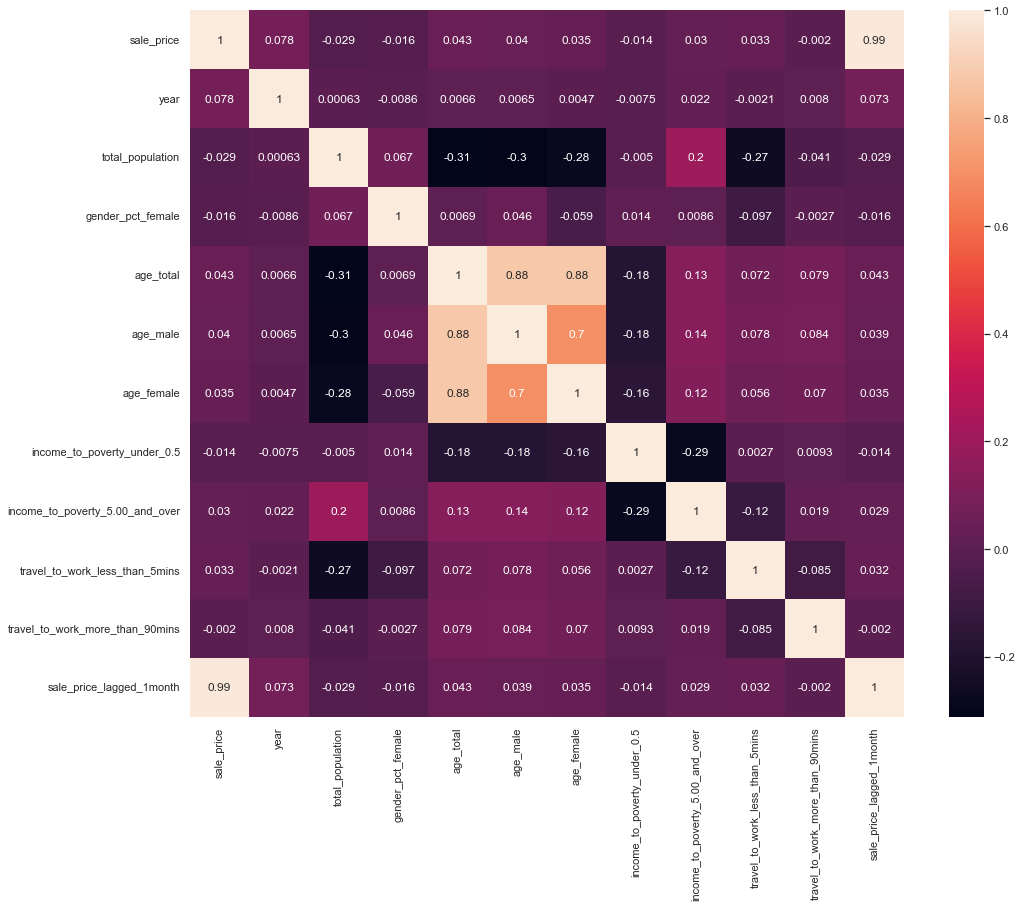

In [428]:
sns.heatmap(corr_housing_census_df.corr(), annot=True);

In [431]:
corr1_housing_census_df = housing_census_df.drop(['zipcode','SizeRank','RegionName','RegionType',\
                                                 'StateName','State','City','Metro','CountyName', 'sale_price_lagged_1month',\
                                                 'sale_price_lagged_12months','gender_pct_male', 'age_total'],axis=1)

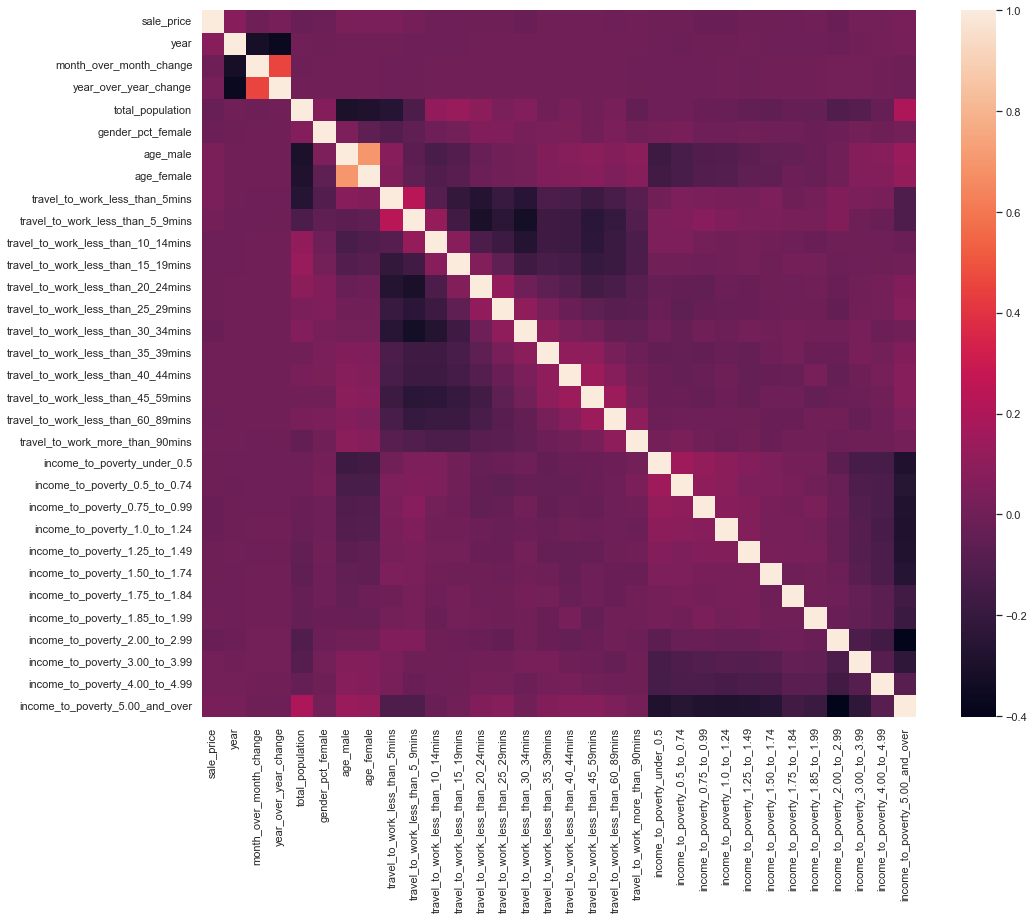

In [432]:
sns.heatmap(corr1_housing_census_df.corr());